**Question 1: Import data and check null values, column info, and descriptive statistics of the data**

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("user_profiles_for_ads.csv")

# Check for missing values
missing_values = data.isnull().sum()

# Display column information
column_information = data.info()

# Display summary statistics
summary_statistics = data.describe()

print("###############################")
print("Missing Values:")
print(missing_values)
print("###############################")
print("\nColumn Information:")
print(column_information)
print("###############################")
print("\nSummary Statistics:")
print(summary_statistics)
print("###############################")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

**Question 2: Begin EDA by visualizing the distribution of key demographic variables (age, gender, education level, and income level)**

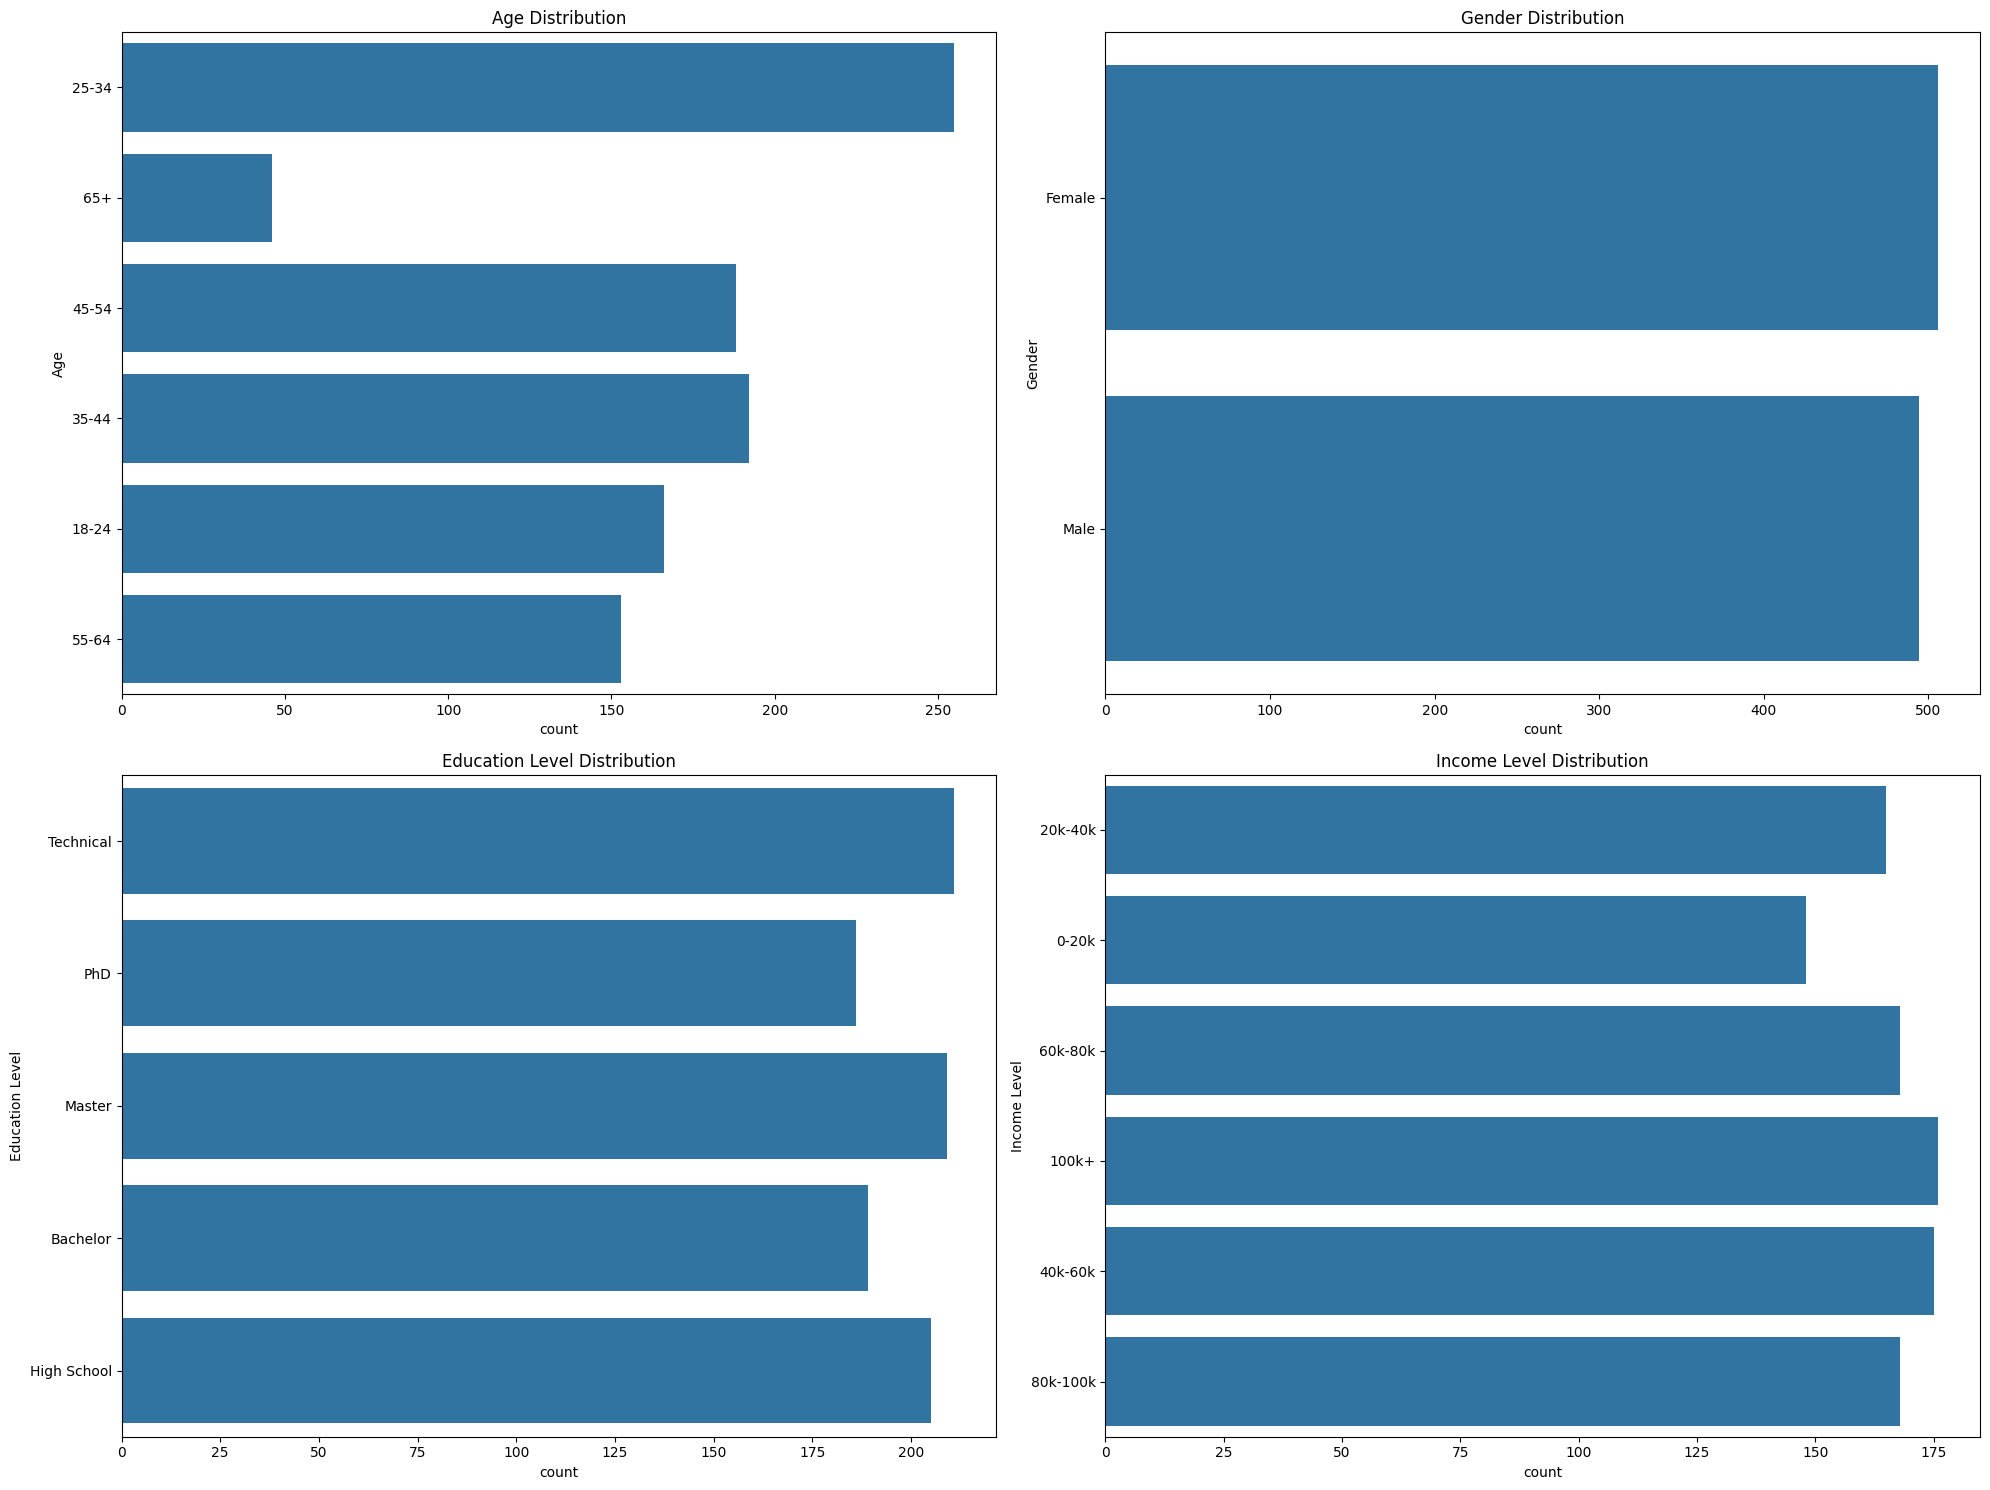

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot size
plt.figure(figsize=(20, 15))

# Plot age distribution
plt.subplot(2, 2, 1)
sns.countplot(data['Age'])
plt.title('Age Distribution')

# Plot gender distribution
plt.subplot(2, 2, 2)
sns.countplot(data['Gender'])
plt.title('Gender Distribution')

# Plot education level distribution
plt.subplot(2, 2, 3)
sns.countplot(data['Education Level'])
plt.title('Education Level Distribution')

# Plot income level distribution
plt.subplot(2, 2, 4)
sns.countplot(data['Income Level'])
plt.title('Income Level Distribution')

plt.tight_layout()
plt.show()


**Question 3: Examine device usage patterns and explore users’ online behavior**

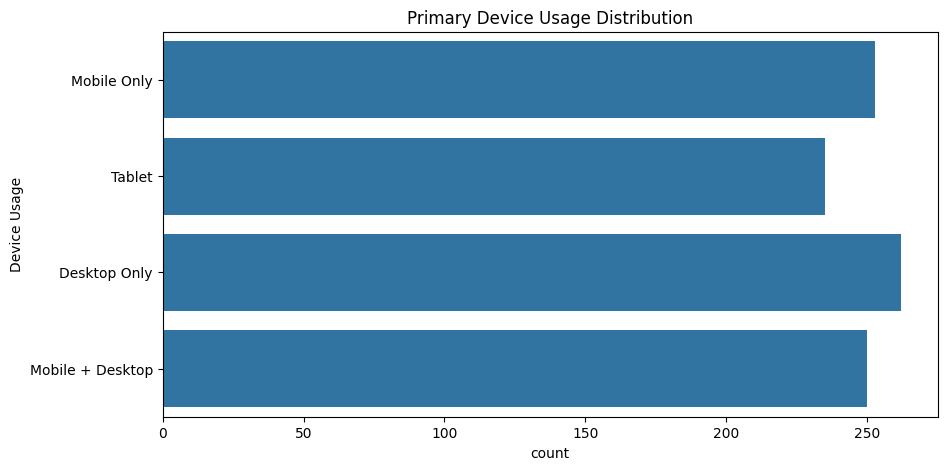

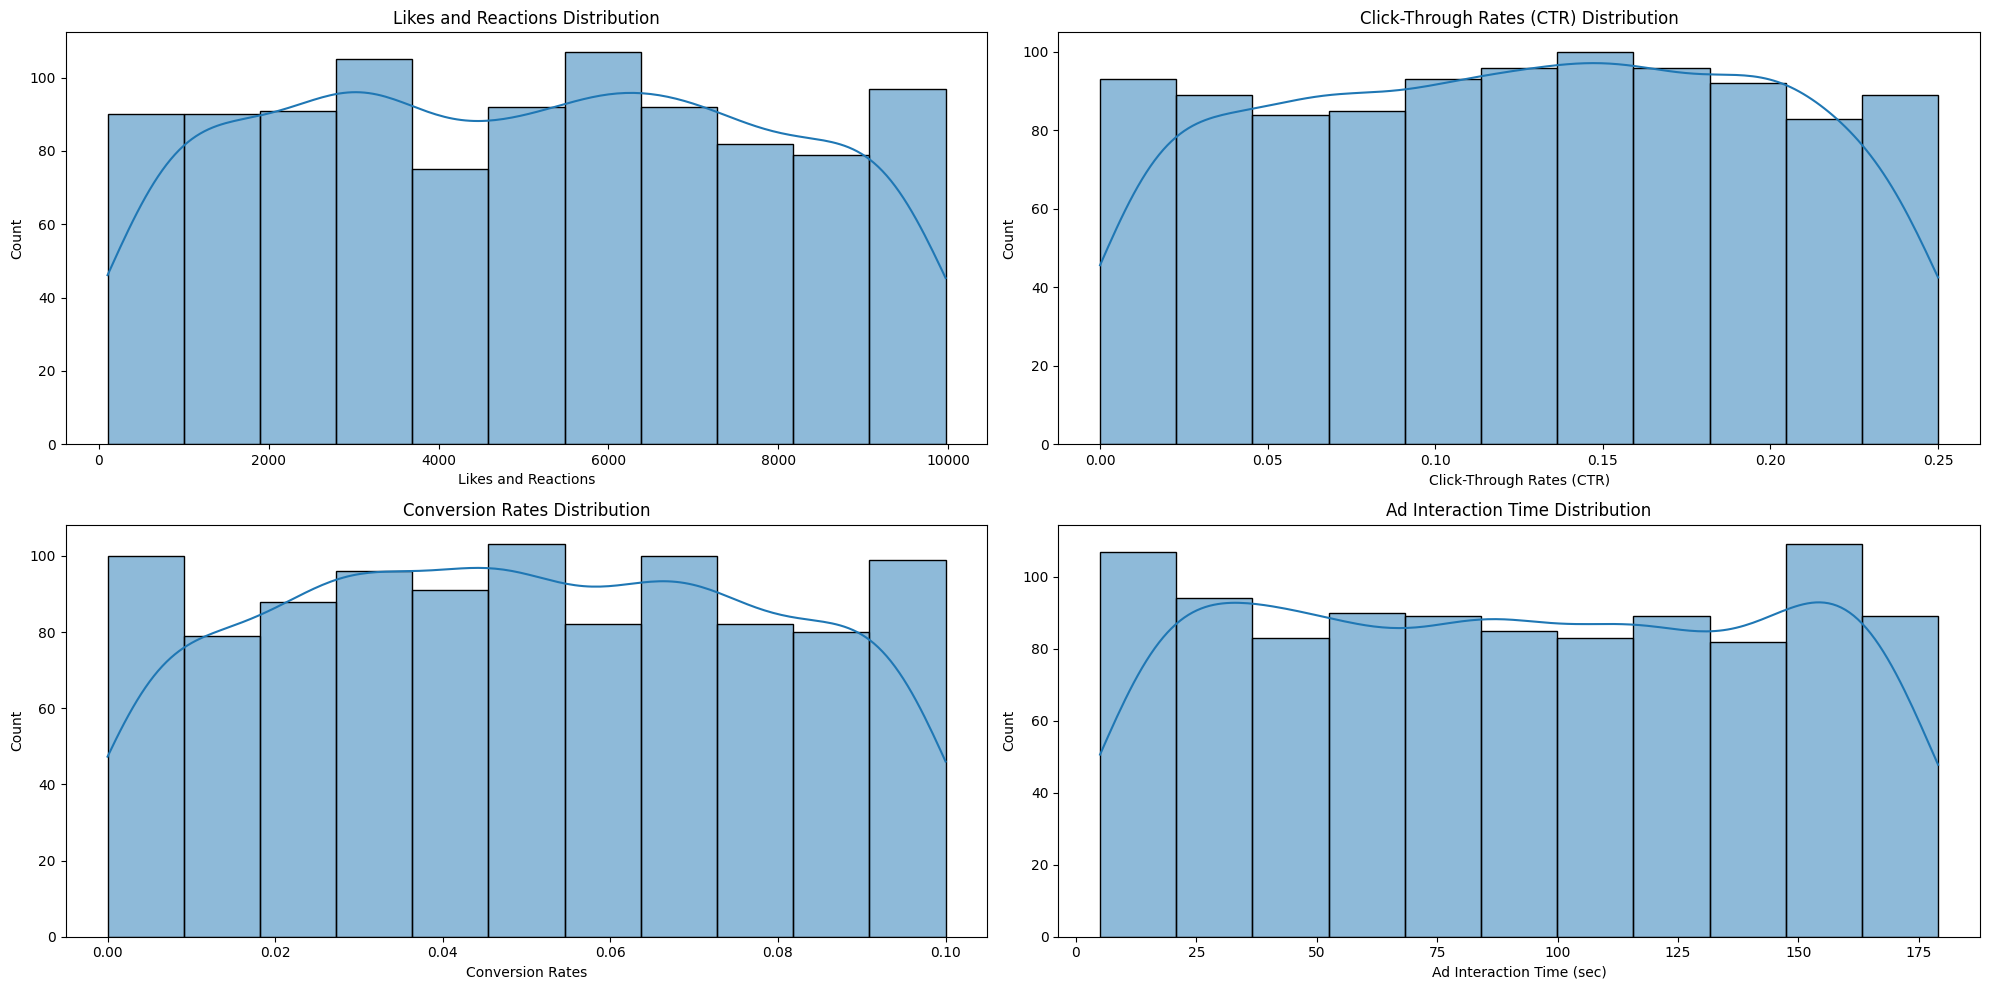

In [5]:
# Plot primary device usage
plt.figure(figsize=(10, 5))
sns.countplot(data['Device Usage'])
plt.title('Primary Device Usage Distribution')
plt.show()

# Plot user engagement metrics
plt.figure(figsize=(20, 10))

# Plot likes and reactions distribution
plt.subplot(2, 2, 1)
sns.histplot(data['Likes and Reactions'], kde=True)
plt.title('Likes and Reactions Distribution')

# Plot click-through rates (CTR) distribution
plt.subplot(2, 2, 2)
sns.histplot(data['Click-Through Rates (CTR)'], kde=True)
plt.title('Click-Through Rates (CTR) Distribution')

# Plot conversion rates distribution
plt.subplot(2, 2, 3)
sns.histplot(data['Conversion Rates'], kde=True)
plt.title('Conversion Rates Distribution')

# Plot ad interaction time distribution
plt.subplot(2, 2, 4)
sns.histplot(data['Ad Interaction Time (sec)'], kde=True)
plt.title('Ad Interaction Time Distribution')

plt.tight_layout()
plt.show()


**Question 4: Analyze the average time users spend online on weekdays vs weekends and user engagement metrics**

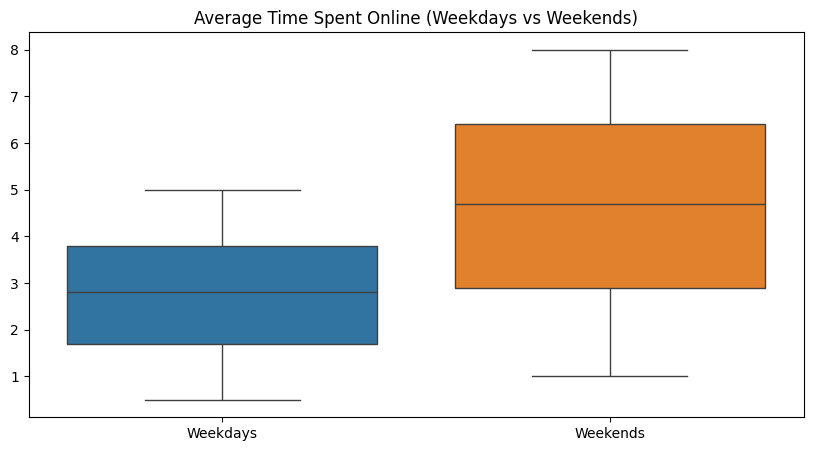

,0
Likes and Reactions,4997.084000
Click-Through Rates (CTR),0.125333
Conversion Rates,0.049805
Ad Interaction Time (sec),91.425000


In [7]:
# Plot average time spent online on weekdays vs weekends
plt.figure(figsize=(10, 5))
sns.boxplot(data=[data['Time Spent Online (hrs/weekday)'], data['Time Spent Online (hrs/weekend)']])
plt.xticks([0, 1], ['Weekdays', 'Weekends'])
plt.title('Average Time Spent Online (Weekdays vs Weekends)')
plt.show()

# Calculate user engagement metrics
engagement_metrics = data[['Likes and Reactions', 'Click-Through Rates (CTR)', 'Conversion Rates', 'Ad Interaction Time (sec)']].mean()
engagement_metrics


**Question 5: Identify the most common interests among users**

<ipython-input-11-177c703902a0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_interests.values, y=common_interests.index, palette=colors)


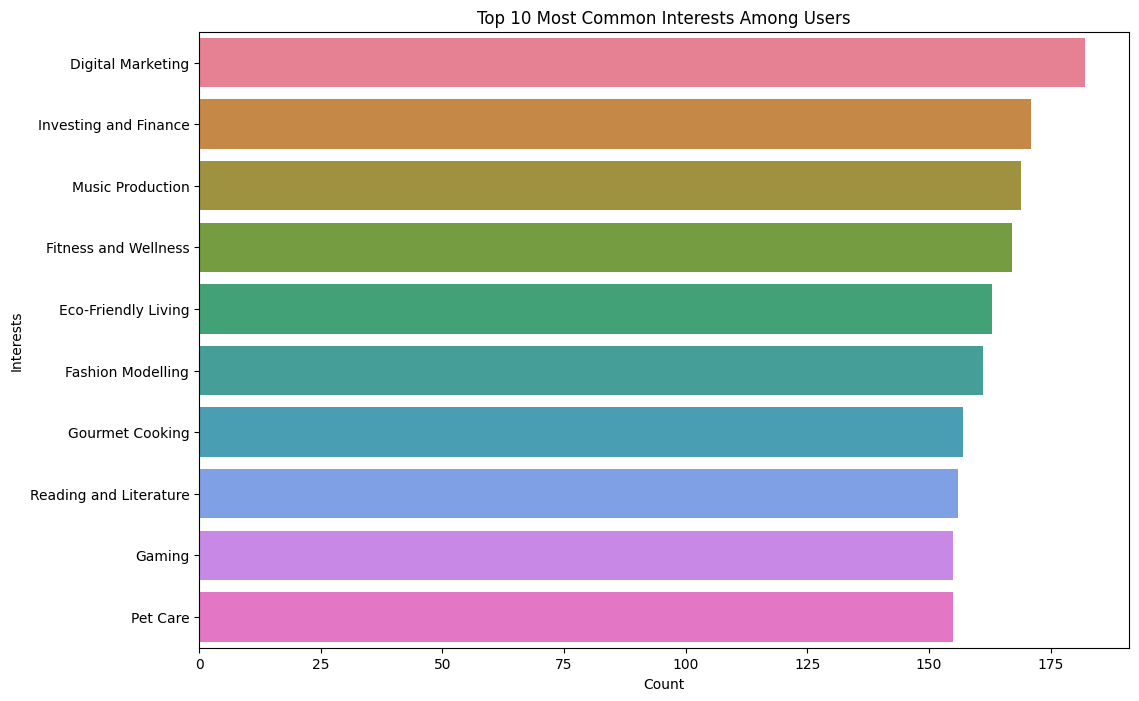

In [11]:
# Split the 'Top Interests' column into individual interests and count their occurrences
interest_list = data['Top Interests'].str.split(',').explode().str.strip()
common_interests = interest_list.value_counts().head(10)
common_interests
# Plot the most common interests
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', len(common_interests))  # Use the 'husl' palette with the number of interests
sns.barplot(x=common_interests.values, y=common_interests.index, palette=colors)
plt.title('Top 10 Most Common Interests Among Users')
plt.xlabel('Count')
plt.ylabel('Interests')
plt.show()

**Question 6: Segment users into distinct groups for targeted ad campaigns**

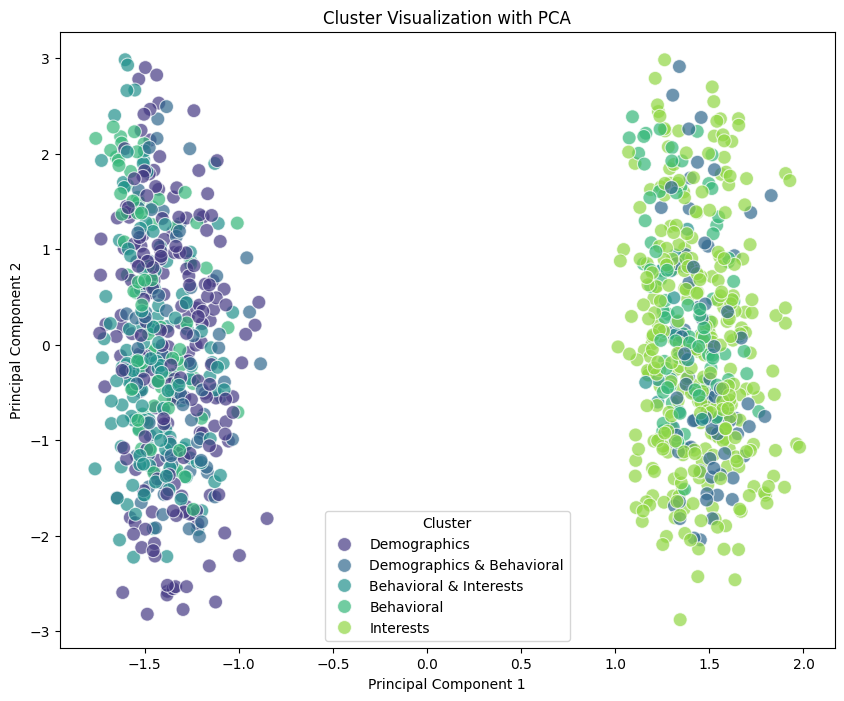

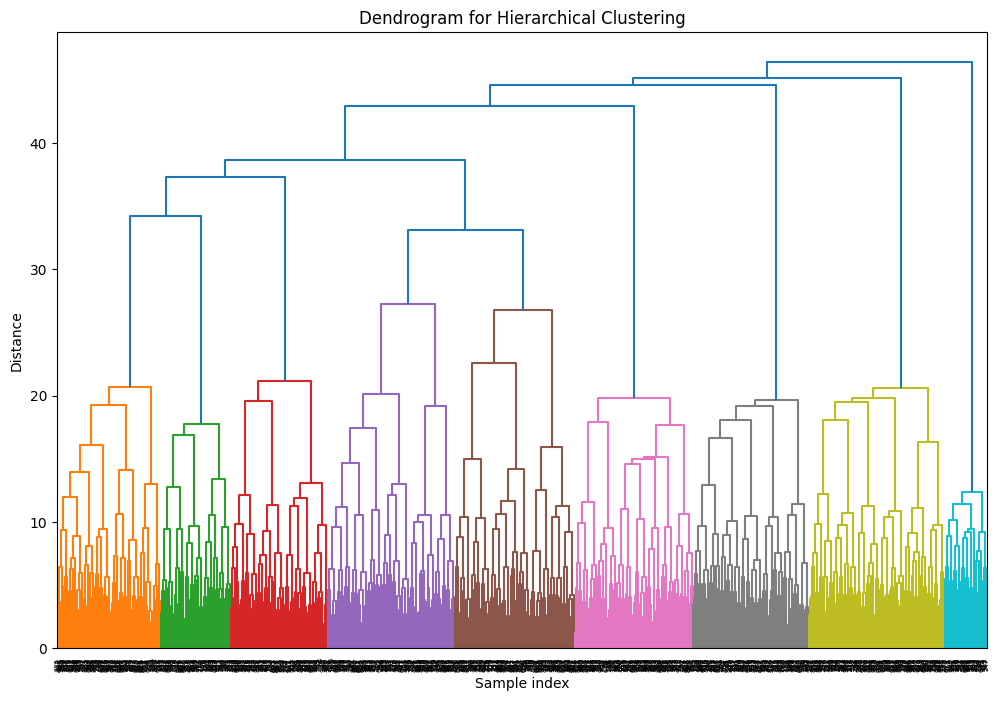

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
data = pd.read_csv("user_profiles_for_ads.csv")

# Select features for clustering
features = data[['Age', 'Gender', 'Education Level', 'Income Level', 'Likes and Reactions', 'Click-Through Rates (CTR)', 'Conversion Rates', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)']]

# Preprocess features (e.g., convert categorical variables to numeric, scale features)
features_encoded = pd.get_dummies(features)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Display cluster centers
cluster_centers = kmeans.cluster_centers_

# Visualize clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

# Define cluster labels for legend
cluster_labels = {
    0: 'Demographics',
    1: 'Behavioral',
    2: 'Interests',
    3: 'Demographics & Behavioral',
    4: 'Behavioral & Interests'
}

# Add cluster labels to the data for legend purposes
data['Cluster Label'] = data['Cluster'].map(cluster_labels)

# Plot PCA visualization with cluster labels in legend
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster Label', data=data, palette='viridis', s=100, alpha=0.7)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Generate dendrogram using hierarchical clustering
linked = linkage(features_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()


**Question 7: Compute the mean values of the numerical features and the mode for categorical features within each cluster**

Data types of columns:
User ID                              int64
Age                                float64
Gender                              object
Location                            object
Language                            object
Education Level                     object
Likes and Reactions                  int64
Followed Accounts                    int64
Device Usage                        object
Time Spent Online (hrs/weekday)    float64
Time Spent Online (hrs/weekend)    float64
Click-Through Rates (CTR)          float64
Conversion Rates                   float64
Ad Interaction Time (sec)            int64
Income Level                        object
Top Interests                       object
Cluster                              int32
PC1                                float64
PC2                                float64
Cluster Label                       object
dtype: object
Missing values in numerical columns:
Age                                1000
Click-Through Rates (CTR) 

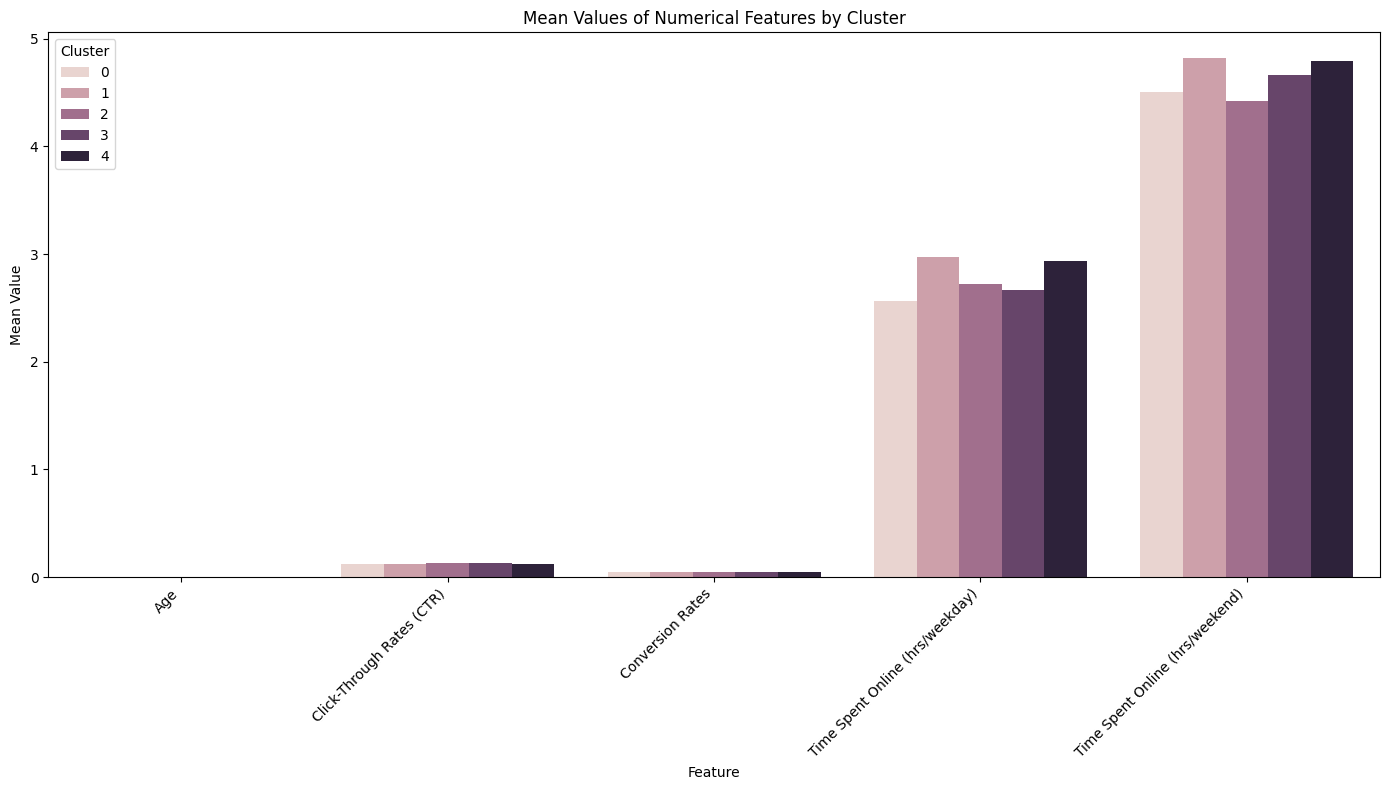

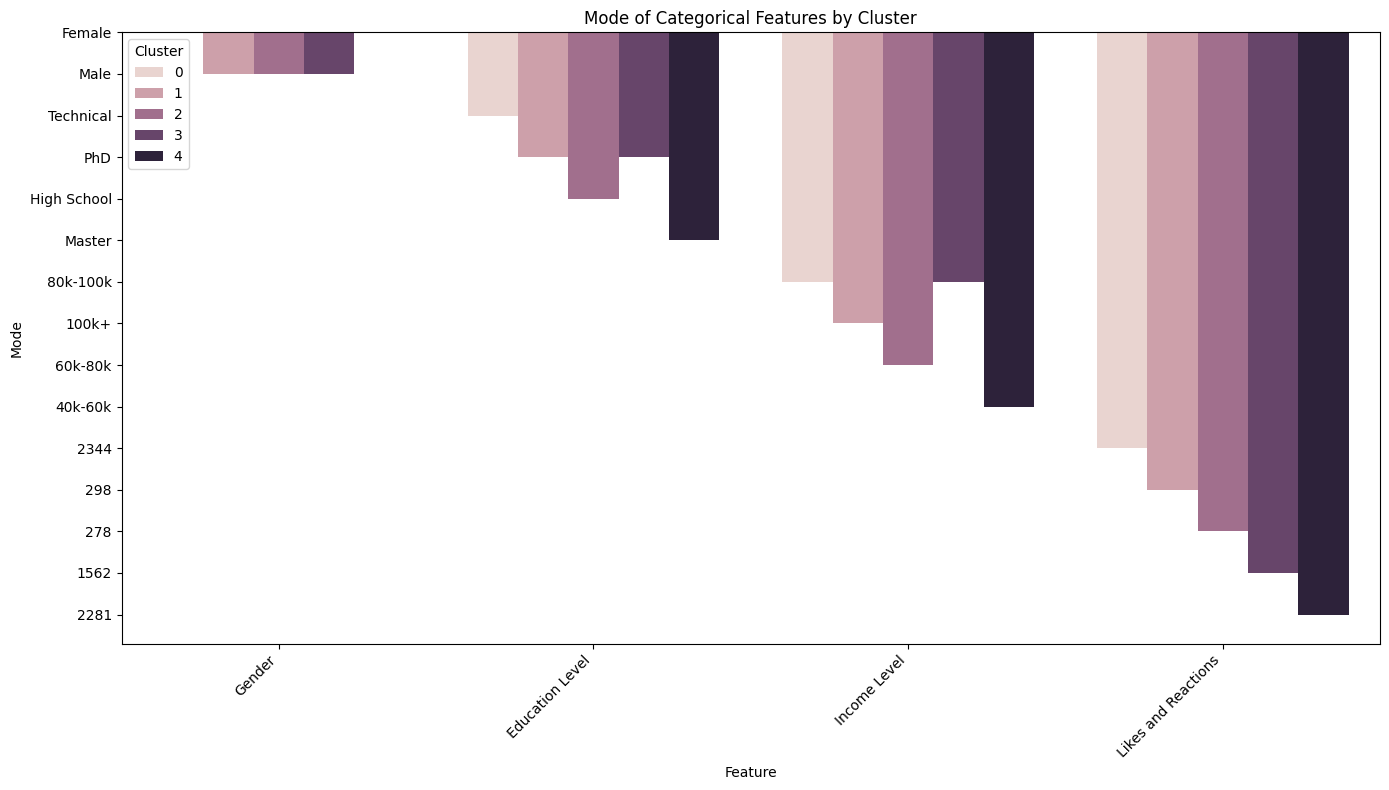

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the cluster column is present (from clustering code)
if 'Cluster' not in data.columns:
    raise ValueError("The 'Cluster' column is missing. Ensure clustering is done before this step.")

# Separate features
numerical_features = ['Age', 'Click-Through Rates (CTR)', 'Conversion Rates', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)']
categorical_features = ['Gender', 'Education Level', 'Income Level', 'Likes and Reactions']

# Ensure that all numerical columns are of numeric type
data[numerical_features] = data[numerical_features].apply(pd.to_numeric, errors='coerce')

# Verify data types
print("Data types of columns:")
print(data.dtypes)

# Check for any remaining non-numeric values
print("Missing values in numerical columns:")
print(data[numerical_features].isna().sum())

# Compute the mean values for numerical features within each cluster
cluster_means = data.groupby('Cluster')[numerical_features].mean()

# Compute the mode for categorical features within each cluster
cluster_modes = data.groupby('Cluster')[categorical_features].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)

# Display results
print("Mean values of numerical features within each cluster:")
print(cluster_means)

print("\nMode of categorical features within each cluster:")
print(cluster_modes)

# Visualization of Mean Values for Numerical Features
cluster_means_plot = cluster_means.reset_index()
cluster_means_plot = cluster_means_plot.melt(id_vars='Cluster', var_name='Feature', value_name='Mean Value')

plt.figure(figsize=(14, 8))
sns.barplot(data=cluster_means_plot, x='Feature', y='Mean Value', hue='Cluster')
plt.title('Mean Values of Numerical Features by Cluster')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Visualization of Modes for Categorical Features
cluster_modes = cluster_modes.astype(str)
cluster_modes_plot = cluster_modes.reset_index()
cluster_modes_plot = cluster_modes_plot.melt(id_vars='Cluster', var_name='Feature', value_name='Mode')

plt.figure(figsize=(14, 8))
sns.barplot(data=cluster_modes_plot, x='Feature', y='Mode', hue='Cluster')
plt.title('Mode of Categorical Features by Cluster')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


**Question 8: Assign each cluster a name**

In [49]:
# Define cluster names based on their characteristics
cluster_names = {
    0: "Weekend Warriors",
    1: "Engaged Professionals",
    2: "Low-Key Users",
    3: "Active Explorers",
    4: "Budget Browsers"
}

data['Cluster Name'] = data['Cluster'].map(cluster_names)
data.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),...,Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster,PC1,PC2,Cluster Label,Cluster Name
0,1,NaN,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,...,0.193,0.067,25,20k-40k,Digital Marketing,0,-1.471066,2.143387,Demographics,Weekend Warriors
1,2,NaN,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,...,0.114,0.044,68,0-20k,Data Science,3,1.633111,0.932400,Demographics & Behavioral,Active Explorers
2,3,NaN,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,...,0.153,0.095,80,60k-80k,Fitness and Wellness,4,-1.530406,-0.878445,Behavioral & Interests,Budget Browsers
3,4,NaN,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,...,0.093,0.061,65,100k+,"Gaming, DIY Crafts",1,-1.235454,-0.349884,Behavioral,Engaged Professionals
4,5,NaN,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,...,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",0,-1.424605,2.530494,Demographics,Weekend Warriors


**Question 9: Create a visualization reflecting these segments using a radar chart**

In [58]:
import plotly.express as px

# Example radar chart with plotly
fig = px.line_polar(data, r='Time Spent Online (hrs/weekday)', theta='Cluster Name', line_close=True)
fig.show()


**Question 10: Summary of the experience**

Here's how I analyize this task:

**1.Data Import and Cleaning:** I started by importing the dataset, took care of any null values, and delved into the descriptive statistics to get a clear understanding of the data.

**2.Exploratory Data Analysis (EDA):** I explored the distribution of key demographic variables and examined patterns in device usage and user engagement metrics through visualizations.

**3.Segmentation:** Using KMeans clustering, I segmented users into distinct groups based on selected features, helping to uncover meaningful patterns.

**4.Cluster Analysis:** I calculated the mean values and modes for features within each cluster, giving each one a name that reflects its unique characteristics.

**5.Visualization:** I created radar charts to visually showcase the distinctive traits of each segment, making it easier to understand the differences and similarities among the clusters.